In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

%matplotlib inline

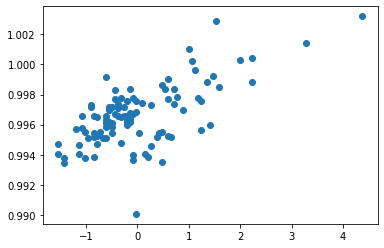

In [2]:

X=pd.read_csv("data/q1/linearX.csv",header=None)
Y=pd.read_csv("data/q1/linearY.csv",header=None)
m=len(X)
X = np.array(X)
Y = np.array(Y)
mean=np.mean(X)
var=np.var(X)**0.5
X=(X-mean)/var
X1=X
plt.scatter(X,Y)

In [3]:

X=np.c_[np.ones(m),X]
theta=np.zeros((X.shape[1],1))
alpha=1
converged=False
cost_last=-1
epsilon=1e-6
ans=0


[[0.99637678]
 [0.00133987]]


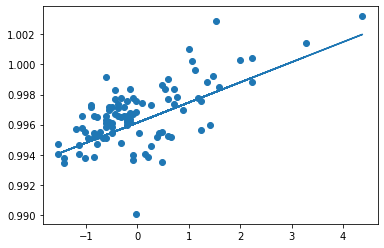

In [4]:
plotTheta=[]
plotCost=[]
while not converged:
    ans+=1
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    grad=np.dot(X.T,(H-Y))/(2*m)
    theta=theta-alpha*grad
    cost=loss/(2*m)
    if abs(cost_last-cost)<epsilon:
        converged=True
    cost_last=cost
    plotTheta.append(theta)
    plotCost.append(cost[0,0])
print(theta)
plt.scatter(X1,Y)
plt.plot(X1,H)
plt.show()

In [5]:
def cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]
x1_size=100
x2_size=100
theta1sample=np.linspace(0,2,x1_size)
theta2sample=np.linspace(-1,1,x2_size)
X1,X2=np.meshgrid(theta1sample,theta2sample)
J = np.asmatrix(np.zeros((x1_size,x2_size),dtype=float))
for i in range(x1_size):
    for j in range(x2_size):
        xx=cost(X,Y,[[X1[i][j]],[X2[i][j]]])
        J[i,j] = xx


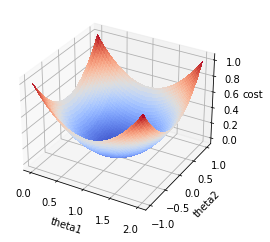

In [6]:

ax=plt.axes(projection='3d')
cp = ax.plot_surface(X1,X2,np.array(J),cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('cost')
theta1=np.array(plotTheta)[:,0]
theta2=np.array(plotTheta)[:,1]
plt.ion()
for i in range(len(plotCost)):
    ax.scatter(theta1[i],theta2[i],plotCost[i],color='red')
    plt.pause(0.1)
plt.ioff()
plt.show()

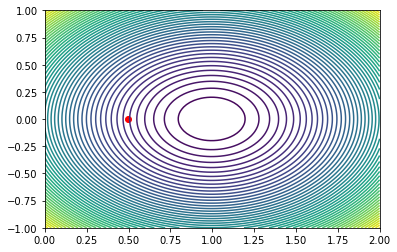

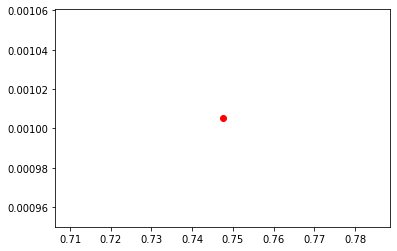

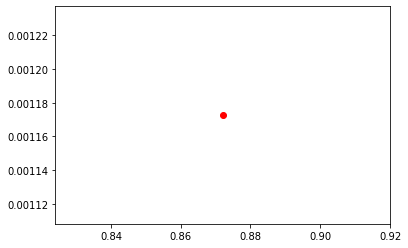

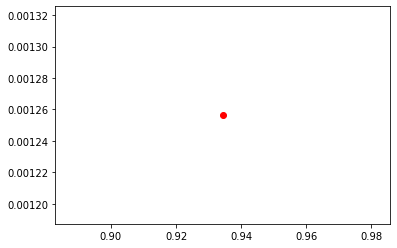

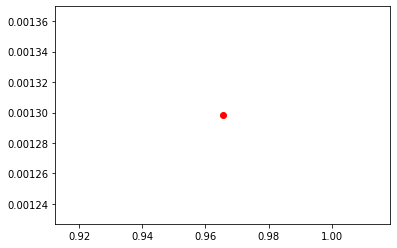

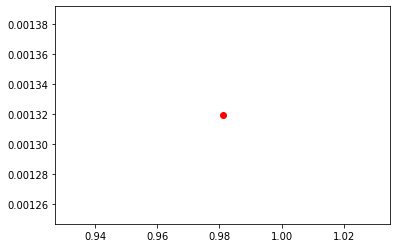

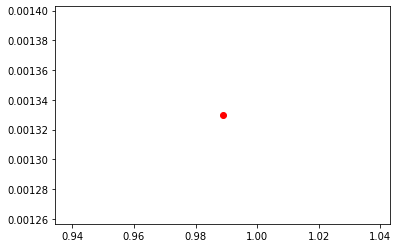

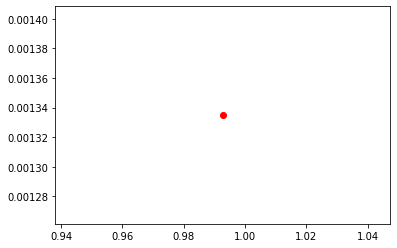

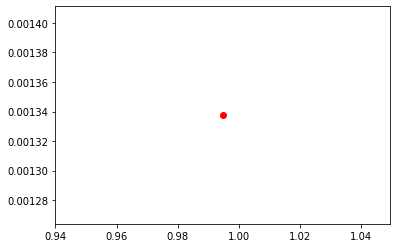

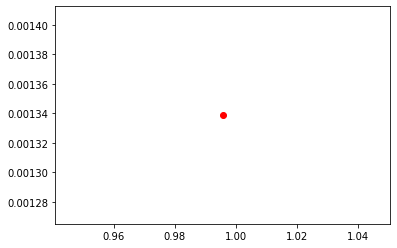

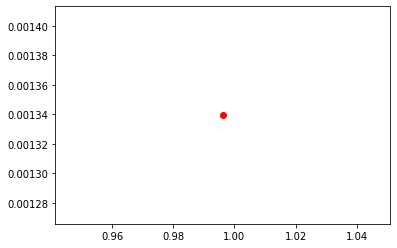

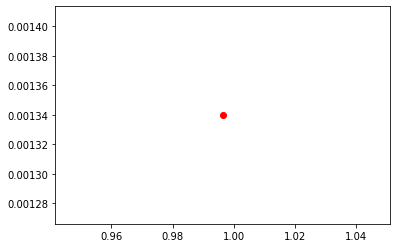

In [11]:
cp=plt.contour(X1,X2,np.array(J),50)
plt.ion()
for i in range(len(plotCost)):
    plt.scatter(theta1[i],theta2[i],color='red')
    plt.pause(0.1)
plt.ioff()
plt.show()

In [8]:
print(plotCost)

[0.4966279047145001, 0.12415787227098321, 0.031040364160104042, 0.007760987132384254, 0.0019411428754543042, 0.00048618181122181365, 0.00012244154516369117, 3.1506478649160556e-05, 8.772712020527846e-06, 3.0892703633697726e-06, 1.6684099490802432e-06, 1.3131948455078304e-06]
